In [1]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
from matplotlib import pyplot
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy
style.use('fivethirtyeight')
%matplotlib inline
# 1. Download sunspot dataset and upload the same to dataset directory
#    Load the sunspot dataset as an Array


In [2]:
df = pd.read_csv("C:\\DCU\\Main\\full_datasets\\fact_price_monthly_dairy.csv")
df.price = df.price.fillna(np.mean(df.price))
df.head()

,id,yearmonth,geo,unit,product,price,source
0,291650,201712,CHINA,EUR/kg,milk,1.448498,clal_dairy_price
1,291649,201711,CHINA,EUR/kg,milk,1.448498,clal_dairy_price
2,291648,201710,CHINA,EUR/kg,milk,1.448498,clal_dairy_price
3,291647,201709,CHINA,EUR/kg,milk,1.448498,clal_dairy_price
4,291646,201708,CHINA,EUR/kg,milk,1.448498,clal_dairy_price


In [3]:
df[['Year']] = df[['yearmonth']].applymap(str).applymap(lambda s: "{}".format(s[0:4]))
df[['Month']] = df[['yearmonth']].applymap(str).applymap(lambda s: "{}".format(s[4:6]))
df.head()

,id,yearmonth,geo,unit,product,price,source,Year,Month
0,291650,201712,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,12
1,291649,201711,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,11
2,291648,201710,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,10
3,291647,201709,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,09
4,291646,201708,CHINA,EUR/kg,milk,1.448498,clal_dairy_price,2017,08


In [4]:
df[['str_date']] = df[['yearmonth']].applymap(str).applymap(lambda s: "{}/{}".format(s[:4],s[4:6]))

In [5]:
df = df.sort_values(by=["Year","Month"])

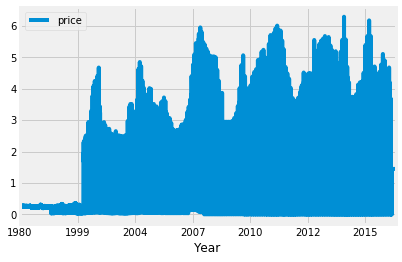

In [6]:
df.plot(x='Year', y='price')

In [7]:
df_year= df[df.Year=="2004"]

In [8]:
df_year = df_year.sort_values(by=["Month"])

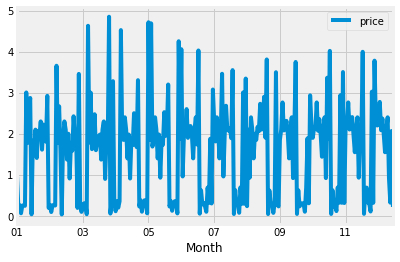

In [9]:
df_year.plot(x='Month', y='price')

In [10]:
df = df.set_index("str_date")

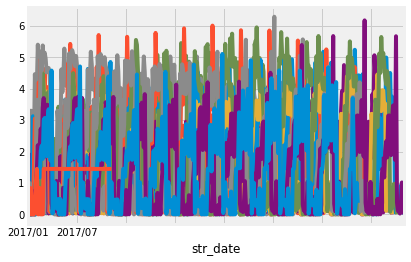

In [11]:
for i in df.Year.unique():
    df_year = df[df.Year==i]
    df_plot = df_year["price"]
    df_plot.plot()
    #pyplot.show()


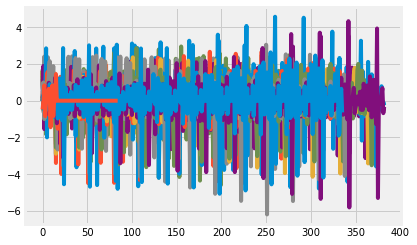

In [12]:
for i in df.Year.unique():
    df_year = df[df.Year == i]
    df_plot = df_year["price"]
    X = df_plot.values
    diff = list()
    for i in range(1, len(X)):
        value = X[i] - X[i - 1]
        diff.append(value)
    pyplot.plot(diff)
    #pyplot.show()



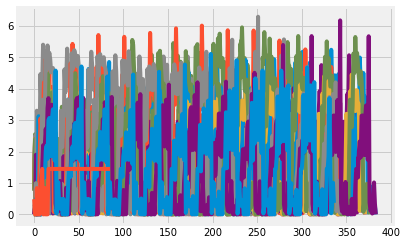

In [13]:
for i in df.Year.unique():
    df_year = df[df.Year==i]
    df_year = df_year["price"]
    X = [j for j in range(0, len(df_year))]
    X = numpy.reshape(X, (len(X), 1))
    y = df_year.values
    model = LinearRegression()
    model.fit(X, y)
    # calculate trend
    trend = model.predict(X)
    # plot trend
    pyplot.plot(y)
    #pyplot.plot(trend)
    #pyplot.show()
    # detrend
    detrended = [y[j]-trend[j] for j in range(0, len(df_year))]
    # plot detrended
    #pyplot.plot(detrended)
    #pyplot.show()

In [14]:
df_year = df[df.Year =="2012"]
x = df_year['Month']
Y = df_year['price']

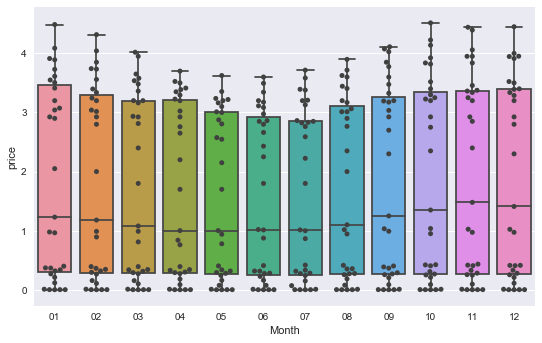

In [15]:
import seaborn as sns
ax = sns.boxplot(x="Month", y="price", data=df_year)
ax = sns.swarmplot(x="Month", y="price", data=df_year, color=".25")

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from numpy import arange, sin, pi, random

np.random.seed(1234)

# Global hyper-parameters
sequence_length = 100
random_data_dup = 10  # each sample randomly duplicated between 0 and 9 times, see dropin function
epochs = 1
batch_size = 50


def dropin(X, y):
    """ The name suggests the inverse of dropout, i.e. adding more samples. See Data Augmentation section at
    http://simaaron.github.io/Estimating-rainfall-from-weather-radar-readings-using-recurrent-neural-networks/
    :param X: Each row is a training sequence
    :param y: Tne target we train and will later predict
    :return: new augmented X, y
    """
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    X_hat = []
    y_hat = []
    for i in range(0, len(X)):
        for j in range(0, np.random.random_integers(0, random_data_dup)):
            X_hat.append(X[i, :])
            y_hat.append(y[i])
    return np.asarray(X_hat), np.asarray(y_hat)


def gen_wave():
    """ Generate a synthetic wave by adding up a few sine waves and some noise
    :return: the final wave
    """
    t = np.arange(0.0, 10.0, 0.01)
    wave1 = sin(2 * 2 * pi * t)
    noise = random.normal(0, 0.1, len(t))
    wave1 = wave1 + noise
    print("wave1", len(wave1))
    wave2 = sin(2 * pi * t)
    print("wave2", len(wave2))
    t_rider = arange(0.0, 0.5, 0.01)
    wave3 = sin(10 * pi * t_rider)
    print("wave3", len(wave3))
    insert = round(0.8 * len(t))
    wave1[insert:insert + 50] = wave1[insert:insert + 50] + wave3
    return wave1 + wave2


def z_norm(result):
    result_mean = result.mean()
    result_std = result.std()
    result -= result_mean
    result /= result_std
    return result, result_mean


def get_split_prep_data(train_start, train_end,
                          test_start, test_end):
    data = gen_wave()
    print("Length of Data", len(data))

    # train data
    #print "Creating train data..."

    result = []
    for index in range(train_start, train_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)

    #print "Mean of train data : ", result_mean
    #print "Train data shape  : ", result.shape

    train = result[train_start:train_end, :]
    np.random.shuffle(train)  # shuffles in-place
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_train, y_train = dropin(X_train, y_train)

    # test data
    #print "Creating test data..."

    result = []
    for index in range(test_start, test_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)

    #print "Mean of test data : ", result_mean
    #print "Test data shape  : ", result.shape

    X_test = result[:, :-1]
    y_test = result[:, -1]

    print("Shape X_train", np.shape(X_train))
    print("Shape X_test", np.shape(X_test))

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test


def build_model():
    model = Sequential()
    layers = {'input': 1, 'hidden1': 64, 'hidden2': 256, 'hidden3': 100, 'output': 1}

    model.add(LSTM(
            input_length=sequence_length - 1,
            input_dim=layers['input'],
            output_dim=layers['hidden1'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden2'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden3'],
            return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
            output_dim=layers['output']))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    #print "Compilation Time : ", time.time() - start
    return model


def run_network(model=None, data=None):
    global_start_time = time.time()

    if data is None:
        #print 'Loading data... '
        # train on first 700 samples and test on next 300 samples (has anomaly)
        X_train, y_train, X_test, y_test = get_split_prep_data(0, 700, 500, 1000)
    else:
        X_train, y_train, X_test, y_test = data

    #print '\nData Loaded. Compiling...\n'

    if model is None:
        model = build_model()

    try:
        print("Training...")
        model.fit(
                X_train, y_train,
                batch_size=batch_size, nb_epoch=epochs, validation_split=0.05)
        print("Predicting...")
        predicted = model.predict(X_test)
        print("Reshaping predicted")
        predicted = np.reshape(predicted, (predicted.size,))
    except KeyboardInterrupt:
        print("prediction exception")
        #print 'Training duration (s) : ', time.time() - global_start_time
        return model, y_test, 0

    try:
        plt.figure(1)
        plt.subplot(311)
        plt.title("Actual Test Signal w/Anomalies")
        plt.plot(y_test[:len(y_test)], 'b')
        plt.subplot(312)
        plt.title("Predicted Signal")
        plt.plot(predicted[:len(y_test)], 'g')
        plt.subplot(313)
        plt.title("Squared Error")
        mse = ((y_test - predicted) ** 2)
        plt.plot(mse, 'r')
        plt.show()
    except Exception as e:
        print("plotting exception")
        print(str(e))
    #print 'Training duration (s) : ', time.time() - global_start_time

    return model, y_test, predicted


run_network()

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


wave1 1000
wave2 1000
wave3 50
Length of Data 1000
X shape: (600, 99)
y shape: (600,)
Shape X_train (2958, 99)
Shape X_test (400, 99)


C:\Users\bhara\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
C:\Users\bhara\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\bhara\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(99, 1), units=64)`
C:\Users\bhara\Anaconda3\lib\site-packages\ipykernel_launcher.py:132: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
C:\Users\bhara\Anaconda3\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Training...
Train on 2810 samples, validate on 148 samples
Epoch 1/1
 850/2810 [========>.....................] - ETA: 97349s - loss: 0.3043 

SystemError: <class 'range'> returned a result with an error set
Apply node that caused the error: Elemwise{Composite{((i0 * i1 * i2) + i3)}}[(0, 1)](TensorConstant{(1, 1, 1) of 1.25}, Subtensor{int64:int64:int64}.0, Subtensor{int64:int64:int64}.0, Subtensor{int64:int64:int64}.0)
Toposort index: 397
Inputs types: [TensorType(float32, (True, True, True)), TensorType(float32, 3D), TensorType(float32, 3D), TensorType(float32, 3D)]
Inputs shapes: [(1, 1, 1), (99, 50, 256), (99, 50, 256), (99, 50, 256)]
Inputs strides: [(4, 4, 4), (-1024, 101376, 4), (-1024, 101376, 4), (-1024, 101376, 4)]
Inputs values: [array([[[ 1.25]]], dtype=float32), 'not shown', 'not shown', 'not shown']
Outputs clients: [[forall_inplace,cpu,grad_of_scan_fn}(TensorConstant{99}, Subtensor{int64:int64:int64}.0, Elemwise{tanh}.0, Alloc.0, InplaceDimShuffle{0,2,1}.0, Elemwise{Composite{(i0 - sqr(i1))}}.0, Subtensor{int64:int64:int64}.0, Subtensor{int64:int64:int64}.0, Elemwise{Composite{((i0 * i1 * i2) + i3)}}[(0, 1)].0, Alloc.0, Alloc.0, Alloc.0, TensorConstant{99}, Subtensor{::, int64:int64:}.0, Subtensor{::, :int64:}.0, Subtensor{::, int64::}.0, Subtensor{::, int64:int64:}.0, InplaceDimShuffle{1,0}.0, InplaceDimShuffle{1,0}.0, InplaceDimShuffle{1,0}.0, Alloc.0, InplaceDimShuffle{1,0}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [ ]:
def get_split_prep_data(train_start, train_end,
                          test_start, test_end):
    data = gen_wave()
    print("Length of Data", len(data))

    # train data
    #print "Creating train data..."

    result = []
    for index in range(train_start, train_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)

    #print "Mean of train data : ", result_mean
    #print "Train data shape  : ", result.shape

    train = result[train_start:train_end, :]
    np.random.shuffle(train)  # shuffles in-place
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_train, y_train = dropin(X_train, y_train)

    # test data
    #print "Creating test data..."

    result = []
    for index in range(test_start, test_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)

    #print "Mean of test data : ", result_mean
    #print "Test data shape  : ", result.shape

    X_test = result[:, :-1]
    y_test = result[:, -1]

    print("Shape X_train", np.shape(X_train))
    print("Shape X_test", np.shape(X_test))

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test


In [ ]:
def run_network(model=None, data=None):
    global_start_time = time.time()

    if data is None:
        #print 'Loading data... '
        # train on first 700 samples and test on next 300 samples (has anomaly)
        X_train, y_train, X_test, y_test = get_split_prep_data(0, 700, 500, 1000)
    else:
        X_train, y_train, X_test, y_test = data

    #print '\nData Loaded. Compiling...\n'

    if model is None:
        model = build_model()

    try:
        print("Training...")
        model.fit(
                X_train, y_train,
                batch_size=batch_size, nb_epoch=epochs, validation_split=0.05)
        print("Predicting...")
        predicted = model.predict(X_test)
        print("Reshaping predicted")
        predicted = np.reshape(predicted, (predicted.size,))
    except KeyboardInterrupt:
        print("prediction exception")
        #print 'Training duration (s) : ', time.time() - global_start_time
        return model, y_test, 0

    try:
        plt.figure(1)
        plt.subplot(311)
        plt.title("Actual Test Signal w/Anomalies")
        plt.plot(y_test[:len(y_test)], 'b')
        plt.subplot(312)
        plt.title("Predicted Signal")
        plt.plot(predicted[:len(y_test)], 'g')
        plt.subplot(313)
        plt.title("Squared Error")
        mse = ((y_test - predicted) ** 2)
        plt.plot(mse, 'r')
        plt.show()
    except Exception as e:
        print("plotting exception")
        print(str(e))
    #print 'Training duration (s) : ', time.time() - global_start_time

    return model, y_test, predicted

In [19]:
data = gen_wave()

wave1 1000
wave2 1000
wave3 50
